# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under the `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 

This exercise is about creating a quickly consumable product; Do **NOT** create a report or lengthy power point presentation. You can choose a poster format or few slides to tell your story (a unique angle) for the data set you have chosen. 

---

Following is to show how to plot to a file to save a graph:

In [9]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [1]:
# Read your data here; 

#U.S. Census Bureau data of how much state and local spending goes to libraries in each state and the population of 
#each state:
#(NOTE: values are in 1000s; The library spend column includes the expenditures made by both the state and local 
#governments)
library_spending <- read.csv("library_expenditures.csv")
head(library_spending)

#National Centers for Environmental Information 100-year data (1901-2000) on the warmest states between the months 
#of June and August: 

warmest_states <- read.csv("warmest_states.csv")
head(warmest_states)

#National Centers for Environmental Information 100-year data (1901-2000) on the coldest states between the months 
#of December and February: 

coldest_states <- read.csv("coldest_states.csv")
head(coldest_states)

#Centroids for mapping 
centroids <- read.csv("centroids.csv")
head(centroids)

#Yearly per capita operating revenue for libraries across the U.S. from the Public Libraries Survey from the Institute 
#of Museum and Library Services 
library_operating_revenue <- read.csv("library_operating_revenue.csv")
head(library_operating_revenue)

State,Total_Expenditures,State_and_Local_Library_Spend,Population,X
<fct>,<fct>,<fct>,<int>,<lgl>
Total,"3,967,961,549","13,039,563",329484123,NA
Alabama,"50,478,634","104,520",4921532,NA
Alaska,"14,996,568","36,778",731158,NA
Arizona,"64,120,262","193,091",7421401,NA
Arkansas,"28,800,119","101,357",3030522,NA
California,"637,923,760","1,760,016",39368078,NA


Location.ID,Location,Value,Rank,Anomaly..1901.2000.base.period.,X1901.2000.Mean
<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>
100,Alabama,78.8,52,-0.2,79.0
200,Arizona,80.5,125,3.2,77.3
300,Arkansas,78.9,64,0.2,78.7
400,California,77.3,127,5.1,72.2
500,Colorado,67.7,124,3.2,64.5
600,Connecticut,71.0,120,2.8,68.2


Location.ID,Location,Value,Rank,Anomaly..1901.2000.base.period.,X1901.2000.Mean
<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>
100,Alabama,46.5,61,-0.1,46.6
200,Arizona,43.8,93,1.5,42.3
300,Arkansas,39.6,27,-1.8,41.4
400,California,46.1,114,2.6,43.5
500,Colorado,26.1,67,0.6,25.5
600,Connecticut,30.4,106,3.4,27.0


state,latcentroid,longcentroid,name
<fct>,<dbl>,<dbl>,<fct>
AK,63.58875,-154.49306,Alaska
AL,32.31823,-86.90230,Alabama
AR,35.20105,-91.83183,Arkansas
AZ,34.04893,-111.09373,Arizona
CA,36.77826,-119.41793,California
CO,39.55005,-105.78207,Colorado


Year,total_per_capita_operating.revenue,federal,state,local,other
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,44.88,0.12,2.99,38.55,3.21
2018,43.65,0.14,2.90,37.51,3.09
2017,42.34,0.15,2.82,36.37,2.99
2016,41.04,0.14,2.83,35.19,2.89
2015,39.94,0.14,2.83,34.16,2.80
2014,39.34,0.15,2.80,33.87,2.94


In [3]:
# Clean it up, reformat it, filter it, sort it, group it, etc.

#Starting with the library_spending data frame, need to remove the X column and take out the commas in the total 
#expenditures and library spend columns. 

suppressMessages(library(tidyverse))
library_spending <- library_spending %>%
    select(State, Total_Expenditures, State_and_Local_Library_Spend, Population)

library_spending$Total_Expenditures <- as.numeric(gsub(",","",library_spending$Total_Expenditures))
library_spending$State_and_Local_Library_Spend <- as.numeric(gsub(",","",library_spending$State_and_Local_Library_Spend))

#Now, we need a new column with how much each state spends on their libraries on a per capita basis
#The column State_and_Local_Library_Spend is in 1000s while the Population column is accurate. Let's rescale the 
#State_and_Local_Library_Spend and then get the per_capita. 

library_spending <- library_spending %>%
    mutate(per_capita_library_spend = (1000*State_and_Local_Library_Spend)/Population)

head(library_spending)



State,Total_Expenditures,State_and_Local_Library_Spend,Population,per_capita_library_spend
<fct>,<dbl>,<dbl>,<int>,<dbl>
Total,3967961549,13039563,329484123,39.57569
Alabama,50478634,104520,4921532,21.23729
Alaska,14996568,36778,731158,50.30103
Arizona,64120262,193091,7421401,26.01813
Arkansas,28800119,101357,3030522,33.44539
California,637923760,1760016,39368078,44.70668


In [4]:
#Now we can move on to our temperature datasets 

#We only need the Location and X1901.2000.Mean columns (We can rename this to summer_1901_2000_mean)

warmest_states <- warmest_states %>%
    select(Location, X1901.2000.Mean) %>%
    rename(summer_1901_2000_mean = X1901.2000.Mean) %>%
    rename(State = Location)

#Same goes for the coldest_states 

coldest_states <- coldest_states %>%
    select(Location, X1901.2000.Mean) %>%
    rename(winter_1901_2000_mean = X1901.2000.Mean) %>%
    rename(State = Location)

#Merging our library expenditure and temperature datasets 
merged <- library_spending %>% inner_join(warmest_states, by="State")
merged_library_temps <- merged %>% inner_join(coldest_states, by="State")
head(merged_library_temps)

merged_library_temps %>%
arrange(desc(per_capita_library_spend))


Warning message:
“Column `State` joining factors with different levels, coercing to character vector”Warning message:
“Column `State` joining character vector and factor, coercing into character vector”

State,Total_Expenditures,State_and_Local_Library_Spend,Population,per_capita_library_spend,summer_1901_2000_mean,winter_1901_2000_mean
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Alabama,50478634,104520,4921532,21.23729,79.0,46.6
Arizona,64120262,193091,7421401,26.01813,77.3,42.3
Arkansas,28800119,101357,3030522,33.44539,78.7,41.4
California,637923760,1760016,39368078,44.70668,72.2,43.5
Colorado,66252836,312871,5807719,53.87158,64.5,25.5
Connecticut,43187166,182419,3557006,51.28442,68.2,27.0


State,Total_Expenditures,State_and_Local_Library_Spend,Population,per_capita_library_spend,summer_1901_2000_mean,winter_1901_2000_mean
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Oregon,60238086,273114,4241507,64.39079,62.0,32.1
Illinois,154656596,809822,12587530,64.33526,73.4,28.1
New York,376911995,1198710,19336776,61.99120,65.9,21.8
Washington,100988748,442996,7693612,57.57972,61.8,30.7
Indiana,64932440,385678,6754953,57.09559,72.5,28.8
Wyoming,10004529,32899,582328,56.49565,62.1,20.5
Wisconsin,64904846,323015,5832655,55.38044,66.4,15.7
Missouri,59111006,332229,6151548,54.00738,75.6,32.1
Colorado,66252836,312871,5807719,53.87158,64.5,25.5


In [19]:
#For the operating revenue dataset, we need to do some cleaning to get it ready to make a line graph 
library_operating_revenue$Year <- as.factor(library_operating_revenue$Year)

library_operating_revenue <- library_operating_revenue %>%
    rename("total" = "total_per_capita_operating.revenue")
head(library_operating_revenue)

library_operating_revenue <- library_operating_revenue %>%
    gather(key="type", value="values", 2:6)


Year,type,values
<fct>,<chr>,<dbl>
2019,total,44.88
2018,total,43.65
2017,total,42.34
2016,total,41.04
2015,total,39.94
2014,total,39.34
2013,total,37.90
2012,total,37.98
2011,total,38.09


In [5]:
install.packages("sp")
install.packages("USAboundariesData", repos = "https://ropensci.r-universe.dev", type = "source")
install.packages("USAboundaries")
install.packages("sf")
install.packages("cartogram")



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘cpp11’, ‘wk’, ‘s2’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘packcircles’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(sp)
library(USAboundaries)
library(sf)

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3


Warning message in cartogram_cont.sf(sf::st_as_sf(x), weight, itermax = itermax, :
“NA not allowed in weight vector. Features will be removed from Shape.”Mean size error for iteration 1: 2.94669200322373
Mean size error for iteration 2: 1.83435717717816
Mean size error for iteration 3: 1.43776152831863
Mean size error for iteration 4: 1.24506842841144
Mean size error for iteration 5: 1.14719097793555
Mean size error for iteration 6: 1.09243605637358
Mean size error for iteration 7: 1.06005950960727
Mean size error for iteration 8: 1.04072671190116
Mean size error for iteration 9: 1.02826383670977
Mean size error for iteration 10: 1.02024807193646
Mean size error for iteration 11: 1.01488919387218
Mean size error for iteration 12: 1.01104533378798
Mean size error for iteration 13: 1.00827502987458
Mean size error for iteration 14: 1.00623449364686
Mean size error for iteration 15: 1.00471667411422
Mean size error for iteration 16: 1.00358620081311
Mean size error for iteration 17: 1.002

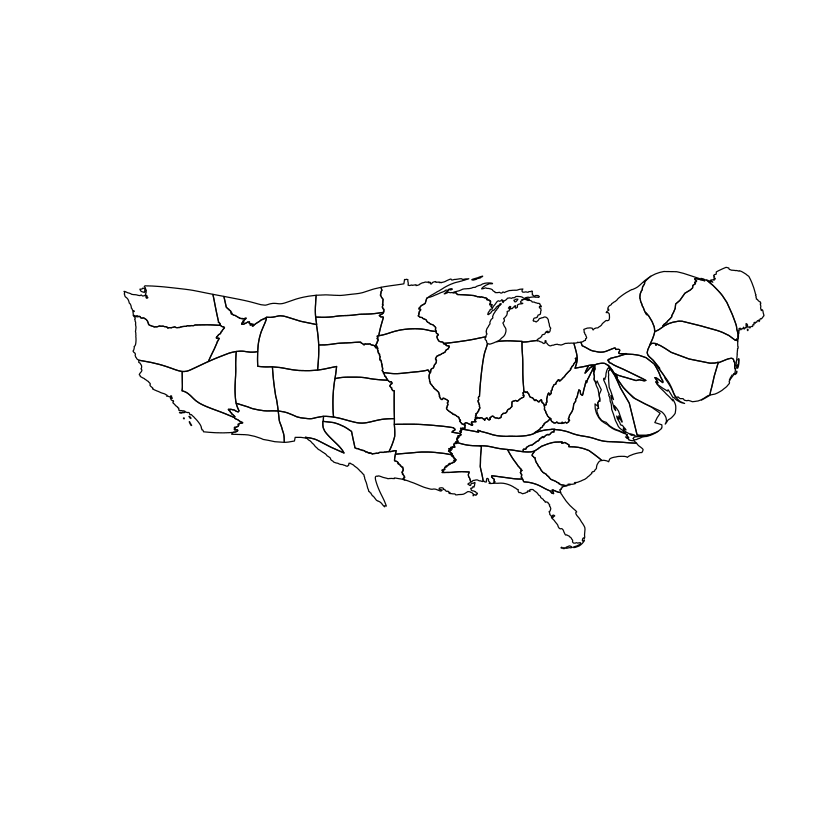

In [7]:
states <- us_states()

spdf <- as_Spatial(states)

final_merged <- merge(spdf, merged_library_temps, by.x = "state_name", by.y = "State")

library(cartogram)
 
us_cartogram <- cartogram_cont(final_merged, "per_capita_library_spend", itermax=40)

#us_cartogram_2 <- cartogram_ncont(final_merged, "per_capita_library_spend", k = 1, inplace=TRUE)

#us_cartogram_3 <- cartogram_dorling(final_merged, "per_capita_library_spend", k = 5, m_weight = 1, itermax = 1000)
 
plot(us_cartogram)

In [10]:

library(broom)
library(ggplot2)

png(filename="hot_cartogram.png")

us_cartogram@data$id <- rownames(us_cartogram@data)
cartogramdata <- fortify(us_cartogram, region = "id")
cartogramdf <- merge(cartogramdata, us_cartogram@data, by = "id")

cartogramdf <- merge(cartogramdf, centroids)

library(RColorBrewer)
Palette1 <- colorRampPalette(brewer.pal(9, "OrRd"))

warm_cartogram <- ggplot() +
geom_polygon(data = cartogramdf, aes(x = long, y = lat, group=group, fill=summer_1901_2000_mean), color="white", alpha=0.9) +
#geom_text(data=cartogramdf, aes(x = longcentroid, y = latcentroid, label = state_abbr), size=4, color="white") + 
labs(title='The hottest states spend the least on their public libraries', 
    caption = "Note: Temperatures are 100-year averages (1901-2000) for each state between June and August.\nSources: 2019 Annual Survey of State and Local Government Finances, U.S. Census;\nNational Centers for Environmental Information\nCredit: Matt Zdun") +
scale_fill_gradientn(colours = Palette1(25), limits=c(60, 90), name="Avg. Temp. June - August") +
coord_map() +
theme_void() + 
theme(legend.position="bottom") + 
theme(text=element_text(family="Sans"))

warm_cartogram

dev.off()


png 
  2

In [12]:
png(filename="hot_lolliplot.png")

warm_lolliplot <- ggplot(cartogramdf, aes(x=summer_1901_2000_mean, y=per_capita_library_spend)) + 
geom_point(size=3.5, color="#ddd4cf") + 
geom_text(label=cartogramdf$state_abbr, nudge_y = 2, size=4) +
geom_segment(aes(x=summer_1901_2000_mean, 
                      xend=summer_1901_2000_mean, 
                      y=0, 
                      yend=per_capita_library_spend), size=0.1) + 
scale_x_continuous(breaks=seq(50,85,by=2)) +
geom_hline(yintercept=0, color='dark gray', size=1.5) + 
geom_hline(yintercept=39.38, color='black', linetype='dotted') +
theme_minimal() +
theme(panel.grid.minor.y = element_blank(), panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), axis.title.x=element_blank(), axis.title.y=element_blank(), axis.text.x=element_blank(),axis.ticks.x=element_blank()) 

warm_lolliplot

dev.off()

png 
  2

In [14]:
png(filename="cold_cartogram.png")

Palette2 <- colorRampPalette(brewer.pal(9, "PuBu"))

cold_cartogram <- ggplot() +
geom_polygon(data = cartogramdf, aes(x = long, y = lat, group=group, fill=winter_1901_2000_mean), color="white", alpha=0.9) +
#geom_text(data=cartogramdf, aes(x = longcentroid, y = latcentroid, label = state_abbr), size=4, color="white") + 
labs(title='The coldest states spend the least on their libraries', 
    caption = "Note: Temperatures are 100-year averages (1901-2000) for each state between December and February.\nSources: 2019 Annual Survey of State and Local Government Finances, U.S. Census;\nNational Centers for Environmental Information\nCredit: Matt Zdun") +
scale_fill_distiller(palette ="PuBu", limits=c(0,60), direction = -1, name="Avg. Temp. Dec. — Feb.") +
coord_map() +
theme_void() + 
theme(legend.position="bottom") + 
theme(text=element_text(family="Sans"))

cold_cartogram

dev.off()

png 
  2

In [15]:
png(filename="cold_lolliplot.png")

cold_lolliplot <- ggplot(cartogramdf, aes(x=winter_1901_2000_mean, y=per_capita_library_spend)) + 
geom_point(size=3.5, color="#ddd4cf") + 
geom_text(label=cartogramdf$state_abbr, nudge_y = 2, size=4) +
geom_segment(aes(x=winter_1901_2000_mean, 
                      xend=winter_1901_2000_mean, 
                      y=0, 
                      yend=per_capita_library_spend), size=0.1) + 
geom_hline(yintercept=0, color='dark gray', size=1.5) + 
geom_hline(yintercept=39.38, color='black', linetype='dotted') +
theme_minimal() +
theme(panel.grid.minor.y = element_blank(), panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), axis.title.x=element_blank(), axis.title.y=element_blank(), axis.text.x=element_blank(),axis.ticks.x=element_blank()) 

cold_lolliplot

dev.off()

png 
  2

In [27]:
png(filename="library_revenue_line.png")

operating_revenue_line_plot <- 
library_operating_revenue %>%
filter(type!="other") %>%
ggplot(aes(x=Year, y=values, group=type, color=type)) +
scale_color_manual(values=c("#a1afa1", "#a1afa1", "#a1afa1", "#1e4a3b")) +
scale_x_discrete(breaks=c('2006', '2010', '2014', '2018')) +
geom_line() +
theme_minimal() + 
theme(panel.grid.minor.y = element_blank(), panel.grid.major.x = element_blank(), text=element_text(family="Sans"),
      axis.title.x=element_blank(), axis.title.y=element_blank(), legend.position = "none") + 
geom_vline(aes(xintercept = which(levels(Year) == '2009')), linetype='dotted') + 
labs(title="Local governments have bumped up the amount of (per-capita)\nrevenue allocated to their public libraries over the last decade",
     subtitle="But states and the federal government largely have not.",
    caption = "Sources: Public Libraries Survey, Institute of Museum and Library Services\nCredit: Matt Zdun") 

operating_revenue_line_plot

dev.off()

png 
  2

In [28]:
png(filename="library_upgrades_needed_slope.png")

library_upgrades_needed <- read.csv("library_upgrades_needed.csv")
library_upgrades_needed <- library_upgrades_needed %>%
                                filter(state!='US')

slope_plot <- ggplot(library_upgrades_needed) + geom_segment(aes(x=0.5, xend=2.5, y=`start`, yend=`end`, color=state), size=.75) +
                scale_color_manual(values=c("AK" = "#9cb4b3", "DC" = "#f3e3db", "HI" = "#c5ccc3", "MD" = "#ad8f83", "WA" = "#b9774b",
                                           "CA" = "#d6bbb2", "DE" = "#364439", "IL" = "#9c5843", "NY" = "#6ca5a0", "WV" = "#cca4a4"))+
                  geom_vline(xintercept=2.5, linetype="dashed", size=.1) +
                  xlim(.5, 2.5) + ylim(-1,(1.1*(max(library_upgrades_needed$`start`, library_upgrades_needed$`end`)))) +
                    theme(text=element_text(family="Sans")) +
                theme_minimal() +
                  theme(axis.title.x=element_blank(),
                axis.text.x=element_blank(),
                axis.ticks.x=element_blank()) +
                ylab('Average Salary Across All Occupations') +
                theme(panel.grid.minor.x = element_blank(), panel.grid.major.x=element_blank(), axis.title.y=element_blank()) +
                labs(title="Libraries need billions more if they are to effectively serve\nclimate refugees", 
                     subtitle="In the past four years, nine states and the District of Columbia assessed their libraries and\ndetermined that they need a total of $8 billion to construct new libraries and renovate\nexisting ones.",
                caption = "\nSource: American Library Association\nCredit: Matt Zdun") +
                theme(plot.title = element_text(size=16)) + 
                theme(plot.subtitle = element_text(size=10)) +
                theme(legend.position = "bottom", legend.title=element_blank(), legend.text=element_text(size=8))
                
slope_plot

dev.off()










png 
  2

In [29]:
png(filename="zoomed_library_upgrades_needed_slope.png")

#Zooming in on the states clustered 
library_upgrades_needed_Zoomed <- library_upgrades_needed %>%
                                filter(state!='CA' & state!='IL' & state!='NY')


slope_plot_zoomed <- ggplot(library_upgrades_needed_Zoomed) + geom_segment(aes(x=0.5, xend=2.5, y=`start`, yend=`end`, color=state), size=.75) +
                scale_color_manual(values=c("AK" = "#9cb4b3", "DC" = "#f3e3db", "HI" = "#c5ccc3", "MD" = "#ad8f83", "WA" = "#b9774b",
                                           "CA" = "#d6bbb2", "DE" = "#364439", "IL" = "#9c5843", "NY" = "#6ca5a0", "WV" = "#cca4a4"))+
                  geom_vline(xintercept=2.5, linetype="dashed", size=.1) +
                  xlim(.5, 2.5) + ylim(-1,(1.1*(max(library_upgrades_needed_Zoomed$`start`, library_upgrades_needed_Zoomed$`end`)))) +
                    theme(text=element_text(family="Sans")) +
                theme_minimal() +
                  theme(axis.title.x=element_blank(),
                axis.text.x=element_blank(),
                axis.ticks.x=element_blank()) +
                ylab('Average Salary Across All Occupations') +
                theme(panel.grid.minor.x = element_blank(), panel.grid.major.x=element_blank(), axis.title.y=element_blank()) +
                labs(title="Libraries need billions more if they are to effectively serve\nclimate refugees", 
                     subtitle="In the past four years, nine states and the District of Columbia assessed their libraries and\ndetermined that they need a total of $8 billion to construct new libraries and renovate\nexisting ones.",
                caption = "\nSource: American Library Association\nCredit: Matt Zdun") +
                theme(plot.title = element_text(size=16)) + 
                theme(plot.subtitle = element_text(size=10)) +
                theme(legend.position = "bottom", legend.title=element_blank(), legend.text=element_text(size=8))
                
slope_plot_zoomed

dev.off()

png 
  2

---

# Common Pitfalls / Inefficiencies

**BEFORE you submit your end product, pay attention to the following in your visualizations and story:**

---

### - Remember the design analysis questions:

**what, how, who, why?** 

- What are showing/telling? 
- How are you going to show it (efficiency? visual tasks like comparison, trends, query, etc.) 
- Who is your audience? Why should they care about what you have to tell? What are the **actionable** information they can take from your story? 
- Why are you telling the story? What is your angle, message, point? (make it clear in text AND visuals) 

---

### - Pay attention to the color schemes/palettes:

Do NOT use sequential palettes for data attributes that have no ordering; do NOT use qualitative color schemes for attributes where order matters. 

---

###  - Color coordinate among plots so that the same data attributes have the same color in all plots:

You can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value (especially important for categories). Do not change color of the same category among plots!

---

###  - Perceptual grouping is important! group and/or order values:

People tend to make sense of things and compare better when they are ordered. 

- In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

- Pie chart: order wedges. 

- In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 

---

### - No lengthy text in x axis:

- **Flip** the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

- at least, put them slanted in x axis for better readibility. 

---

### - Plot only those that tell an obvious story:

**No crowded** scatter plots with useless linear regression lines that don't tell anything.  You do NOT have to plot ALL your data. Look at alternative plots to tell your story. **Also, look below:** 

---

### - If you have too many classes (discrete variables/categories), try to GROUP them:

- Instead of giving a color to each of the dozen or so categories, you can put them in meaningful groups and color code to reduce clutter. 

- For sequential variables, you can do the same thing by **binning** numbers into bins (like in a histogram). 

- **Stepped color palettes** may be more useful than smooth sequential palettes (especially for comparison in choropleth maps) for a large range of values in an attribute. 

- You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

- Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 

---

### - ANNOTATE! ANNOTATE! ANNOTATE!

- **Tell** your audience what they are supposed to see. 

- Use meaningful titles with a message, not dry titles. 

- Use nice and concise axis labels. 

- Use text annotations (look at the **examples in the lab notebook**).

---

### - THEMING

- **Good looking** charts are more **convincing**!

- **Almost NEVER use the default color palette, default theme, default font.**

- Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 

---

### - Use space wisely!

- **Balance the plots** to use space effectively.

- Pay attention to **data-ink ratio**.

- **HAVE A FLOW left to right, top to bottom**. 